In [1]:
import pandas as pd
import numpy as np
import dill as pickle
from datetime import datetime, timedelta

from cosinorage.dataloaders import GalaxyDataLoader, plot_orig_enmo, plot_enmo, plot_orig_enmo_freq
from cosinorage.features import WearableFeatures

%load_ext autoreload
%autoreload 2

In [2]:
reload_galaxy = True

In [3]:
preprocess_args = {
    'autocalib_tol': 10e-15,
    'autocalib_max_iter': 500,
    'autocalib_epoch_size': 20,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'autocalib_sd_criter': 1665,
    'autocalib_mean_criter': 2,
    'autocalib_sphere_crit': 1
}

In [4]:
if reload_galaxy:
    galaxy_loader = GalaxyDataLoader(gw_file_dir='../data/smartwatch/GalaxyWatch_Case1/', preprocess=True, preprocess_args=preprocess_args)
    galaxy_loader.load_data(verbose=True)
    with open("pickle/galaxy_loader.pkl", "wb") as file:
        pickle.dump(galaxy_loader, file)
else:
    with open("pickle/galaxy_loader.pkl", "rb") as file:
        galaxy_loader = pickle.load(file)

Read 282 files from ../data/smartwatch/GalaxyWatch_Case1/
Loaded 24921000 accelerometer data records from ../data/smartwatch/GalaxyWatch_Case1/
Filtered out 7929206 accelerometer records due to incomplete daily coverage
Filtered out 6349008 minute-level accelerometer records due to filtering for longest consecutive sequence of days
Sphere is not well-populated.
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Preprocessed accelerometer data
Calculated ENMO for 10642786 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records
load_data executed in 98.89 seconds


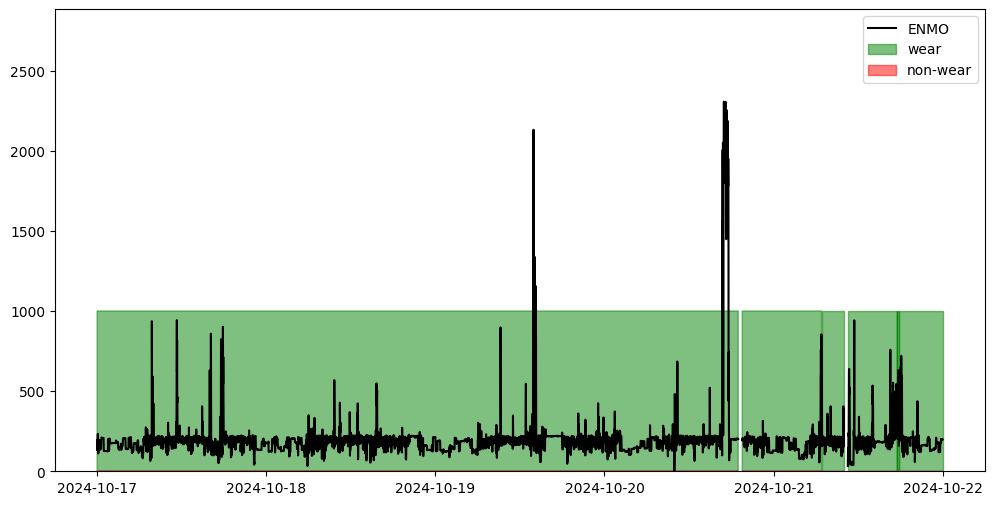

In [5]:
plot_enmo(galaxy_loader)

In [6]:
galaxy_loader.get_meta_data()

{'datasource': 'samsung galaxy watch',
 'raw_data_frequency': 25,
 'raw_data_type': 'accelerometer',
 'raw_data_unit': 'm/s^2',
 'raw_acc_timesteps': 24921000,
 'total time': 431999.962,
 'wear time': 40815.68,
 'non-wear time': 391184.282,
 'preprocessed_acc_timesteps': 10642786,
 'enmo_timesteps': 7200,
 'n_days': 5,
 'start_datetime': Timestamp('2024-10-17 00:00:00'),
 'end_datetime': Timestamp('2024-10-21 23:59:00')}

/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/utils/cosinor_analysis.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  fitted_vals_df = pd.concat([fitted_vals_df, model.fittedvalues], ignore_index=False)


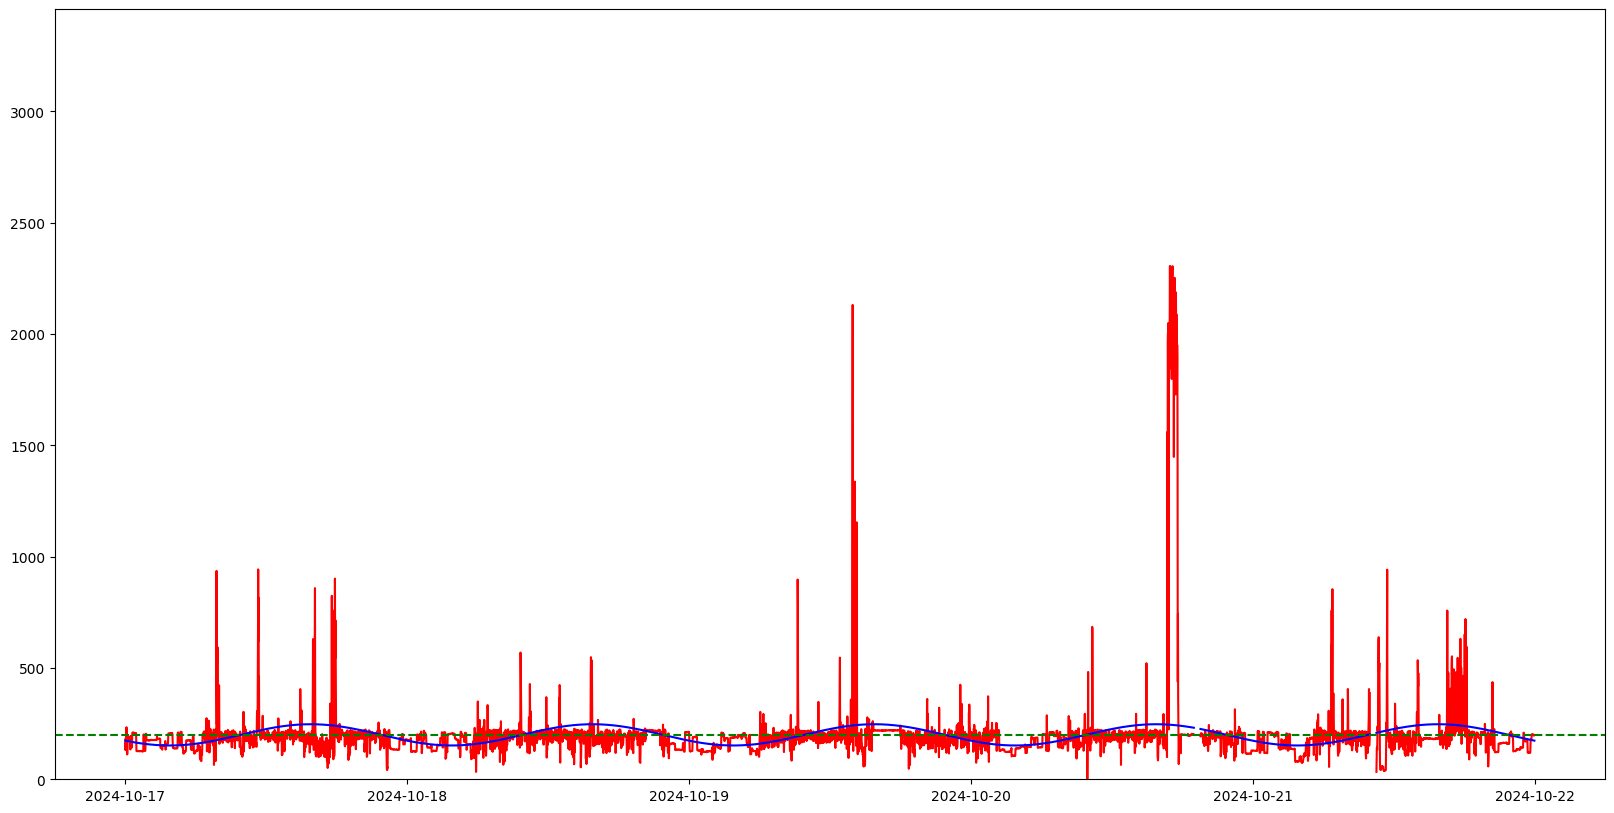

In [7]:
features = WearableFeatures(galaxy_loader)
features.run()
features.plot_cosinor(multiday=True)

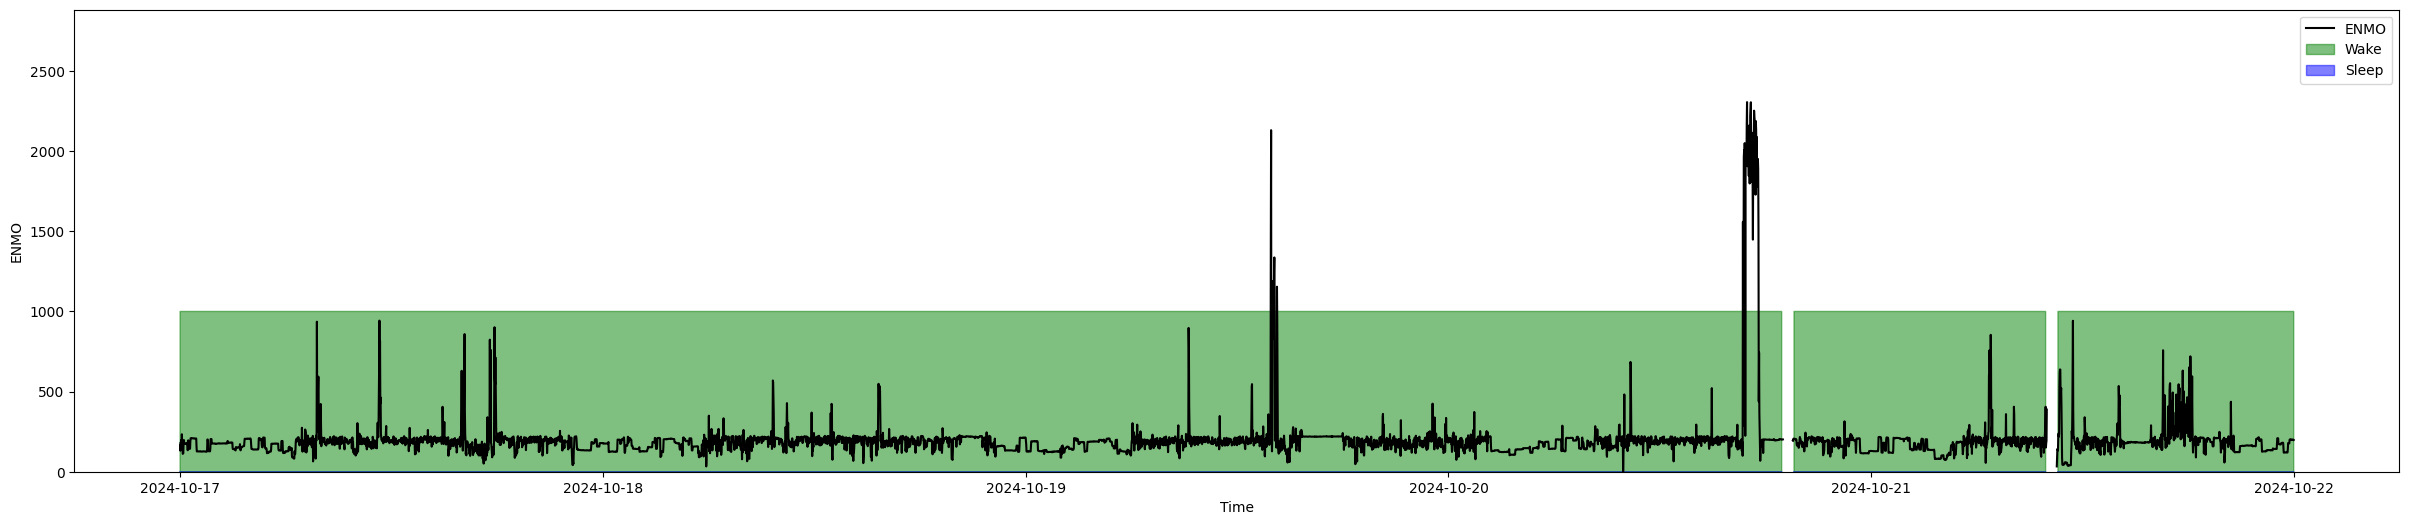

In [8]:
features.plot_sleep_predictions(simple=False)

In [9]:
features.get_cosinor_features()[1]

{'MESOR': 199.56490496273202,
 'amplitude': 47.74049285610386,
 'acrophase': 4.13718530342582,
 'acrophase_time': 15.80288379665669}

In [10]:
galaxy_loader.meta_dict

{'datasource': 'samsung galaxy watch',
 'raw_data_frequency': 25,
 'raw_data_type': 'accelerometer',
 'raw_data_unit': 'm/s^2',
 'raw_acc_timesteps': 24921000,
 'total time': 431999.962,
 'wear time': 40815.68,
 'non-wear time': 391184.282,
 'preprocessed_acc_timesteps': 10642786,
 'enmo_timesteps': 7200,
 'n_days': 5,
 'start_datetime': Timestamp('2024-10-17 00:00:00'),
 'end_datetime': Timestamp('2024-10-21 23:59:00')}

In [11]:
galaxy_loader.acc_df.describe()

,X,Y,Z,X_raw,Y_raw,Z_raw,wear,ENMO
count,1.064279e+07,1.064279e+07,1.064279e+07,1.064279e+07,1.064279e+07,1.064279e+07,1020392.0,1.064279e+07
mean,8.972400e+02,-1.415089e+03,6.640292e+02,8.972400e+02,-1.415089e+03,6.640292e+02,1.0,4.180989e+03
std,2.089707e+03,2.238765e+03,2.228952e+03,2.129631e+03,2.358165e+03,2.276518e+03,0.0,3.264896e+02
min,-1.699188e+04,-1.399028e+04,-1.695714e+04,-3.274900e+04,-3.274900e+04,-3.255400e+04,1.0,5.613585e+01
25%,-2.573451e+02,-3.203690e+03,-9.329292e+02,-2.590000e+02,-3.198000e+03,-9.420000e+02,1.0,4.116663e+03
50%,9.191908e+02,-1.958394e+03,9.042246e+02,9.210000e+02,-1.919000e+03,9.160000e+02,1.0,4.164516e+03
75%,2.511123e+03,-1.185412e+01,2.451024e+03,2.516000e+03,9.000000e+00,2.471000e+03,1.0,4.195568e+03
max,7.199193e+03,8.878763e+03,8.973374e+03,3.156000e+04,3.270900e+04,3.276400e+04,1.0,1.759426e+04
